In [157]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import defaultdict

In [136]:
img = imread('images/s_regular_times.png', pilmode='L')

In [137]:
binarized = 1.0 * (img < 128)

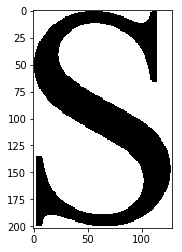

In [146]:
plt.imshow(binarized, cmap='Greys', interpolation='nearest')

In [196]:
def random_padding(fixed_size, expanding_size, factor_limits, axis=0):
    factor = np.random.uniform(*factor_limits)
    amount = int(expanding_size * factor)
    if axis == 0:
        return np.zeros((fixed_size, amount))
    return np.zeros((amount, fixed_size))

def pad_image(image, pattern=[0, 0, 0, 0]):
    top, right, bottom, left = pattern
    sizes = (0, 0), (0, 1), (1, 3)
    top_padding = random_padding(fixed_size=image.shape[1], expanding_size=image.shape[0], factor_limits=sizes[top], axis=1)
    image = np.vstack((top_padding, image))
    right_padding = random_padding(fixed_size=image.shape[0], expanding_size=image.shape[1], factor_limits=sizes[right])
    image = np.hstack((image, right_padding))
    bottom_padding = random_padding(fixed_size=image.shape[1], expanding_size=image.shape[0], factor_limits=sizes[bottom], axis=1)
    image = np.vstack((image, bottom_padding))
    left_padding = random_padding(fixed_size=image.shape[0], expanding_size=image.shape[1], factor_limits=sizes[left])
    return np.hstack((left_padding, image))

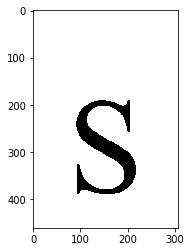

In [139]:
padded = pad_image(binarized, pattern=[1,1,1,1])
plt.imshow(padded, cmap='Greys', interpolation='nearest')
plt.show()

In [197]:
def generate_images(unpadded, amount_per_pattern=3):
    images = [unpadded]
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    for _ in range(amount_per_pattern):
                        img = pad_image(unpadded, pattern=[i, j, k, l])
                        images.append(img)
    return images

In [198]:
letter_names = os.listdir('images')
binarized_images = defaultdict(list)
for name in letter_names:
    img = imread(f'images/{name}', pilmode='L')
    binarized = 1.0 * (img < 128)
    binarized_images[name[0]].append(binarized)

In [199]:
binarized_padded_images = {}
for letter in binarized_images:
    images = binarized_images[letter]
    padded_images = []
    for img in images:
        padded_images += generate_images(img, amount_per_pattern=1)
    binarized_padded_images[letter] = padded_images

In [200]:
for letter in binarized_padded_images:
    images = binarized_padded_images[letter]
    for i in range(len(images)):
        np.save(f'dataset/{letter}_{i}.npy', images[i])